In [1]:
import datetime, mmap,os,re, sys, decimal, hddm
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy as sp
from patsy import dmatrix
% matplotlib inline 
% reload_ext rpy2.ipython
%R library(lsmeans)
%R library(afex)

/Users/mlm2/anaconda/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)
/Users/mlm2/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: estimability

  warnings.warn(x, RRuntimeWarning)
/Users/mlm2/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: lme4

  warnings.warn(x, RRuntimeWarning)
/Users/mlm2/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)
/Users/mlm2/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: reshape2

  warnings.warn(x, RRuntimeWarning)
/Users/mlm2/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.

array(['afex', 'reshape2', 'lme4', 'Matrix', 'lsmeans', 'estimability',
       'tools', 'stats', 'graphics', 'grDevices', 'utils', 'datasets',
       'methods', 'base'], 
      dtype='<U12')

In [28]:
path2data = '/Users/mlm2/Work/Expts/StressMem/Data/Beh_Pilots/'

adding in our 4 pilots...

In [158]:
data = pd.read_csv(path2data + 'Pilot4_StressMem_Retrieval_1.csv')
data = data.append(pd.read_csv(path2data + 'Pilot3_StressMem_Retrieval_1.csv'))
data = data.append(pd.read_csv(path2data + 'Pilot2_StressMem_Retrieval_1.csv'))
data = data.append(pd.read_csv(path2data + 'Pilot1_StressMem_Retrieval_1.csv'))
data

,subject,session,trial,word,status,recog_resp,recog_rt,task,task_resp,task_rt,iti_dur
0,Pilot4,1,1,annoying,new,6,1.850,NaN,NaN,999.000,501
1,Pilot4,1,2,miserable,new,5,0.417,NaN,NaN,999.000,501
2,Pilot4,1,3,heartbroken,new,5,1.017,NaN,NaN,999.000,501
3,Pilot4,1,4,grumpy,old,1,1.767,Describes_you,6.0,0.800,501
4,Pilot4,1,5,confident,old,1,0.584,Describes_you,5.0,1.400,501
5,Pilot4,1,6,smart,new,3,1.467,NaN,NaN,999.000,1002
6,Pilot4,1,7,terrified,new,5,0.636,NaN,NaN,999.000,501
7,Pilot4,1,8,uninvited,old,3,2.201,Describes_you,NaN,999.000,2004
8,Pilot4,1,9,expert,old,1,0.717,Describes_you,6.0,2.034,501
9,Pilot4,1,10,coward,new,3,1.620,NaN,NaN,999.000,1002


"correct" here is pretty generous, we give it to them if they select "sure" "probably" or "maybe" in the correct direction

In [159]:
data['correct_recog'] = 0
data.loc[(data.status == 'old') & (data.recog_resp <= 3), 'correct_recog'] = 1
data.loc[(data.status == 'new') & (data.recog_resp >= 4), 'correct_recog'] = 1
data

,subject,session,trial,word,status,recog_resp,recog_rt,task,task_resp,task_rt,iti_dur,correct_recog
0,Pilot4,1,1,annoying,new,6,1.850,NaN,NaN,999.000,501,1
1,Pilot4,1,2,miserable,new,5,0.417,NaN,NaN,999.000,501,1
2,Pilot4,1,3,heartbroken,new,5,1.017,NaN,NaN,999.000,501,1
3,Pilot4,1,4,grumpy,old,1,1.767,Describes_you,6.0,0.800,501,1
4,Pilot4,1,5,confident,old,1,0.584,Describes_you,5.0,1.400,501,1
5,Pilot4,1,6,smart,new,3,1.467,NaN,NaN,999.000,1002,0
6,Pilot4,1,7,terrified,new,5,0.636,NaN,NaN,999.000,501,1
7,Pilot4,1,8,uninvited,old,3,2.201,Describes_you,NaN,999.000,2004,1
8,Pilot4,1,9,expert,old,1,0.717,Describes_you,6.0,2.034,501,1
9,Pilot4,1,10,coward,new,3,1.620,NaN,NaN,999.000,1002,0


## Recognition

**Note:** Pilots 1-3 don't have 100 trials because of a (now fixed) programming error in the retrieval task

In [160]:
print (data.correct_recog.value_counts()) # looking at totals

1    238
0     69
Name: correct_recog, dtype: int64


so they were correct 77.5% of the time

In [161]:
print (data.groupby('subject')['correct_recog'].value_counts()) # by participant

subject  correct_recog
Pilot1   1                64
         0                 5
Pilot2   1                40
         0                30
Pilot3   1                54
         0                14
Pilot4   1                80
         0                20
Name: correct_recog, dtype: int64


In [162]:
print ('Percent correct: ')
print (data.groupby('subject')['correct_recog'].value_counts()[:,1]/(data.groupby('subject')['correct_recog'].value_counts()[:,0] + data.groupby('subject')['correct_recog'].value_counts()[:,1]) * 100) 

Percent correct: 
subject
Pilot1    92.753623
Pilot2    57.142857
Pilot3    79.411765
Pilot4    80.000000
Name: correct_recog, dtype: float64


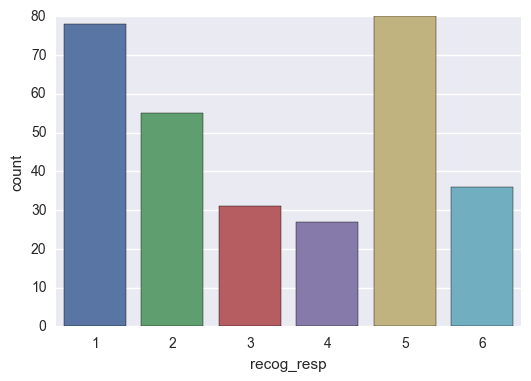

In [200]:
resp_plot = sns.countplot(x="recog_resp", data=data, order=[1,2,3,4,5,6])

In [163]:
data.loc[(pd.notnull(data.task) & pd.notnull(data.task_resp)), 'correct_source'] = 0
data.loc[(data.task == 'Describes_you') & (data.task_resp > 3), 'correct_source'] = 1
data.loc[(data.task == 'Emotion') & (data.task_resp < 4), 'correct_source'] = 1
data.head()

In [164]:
data

,subject,session,trial,word,status,recog_resp,recog_rt,task,task_resp,task_rt,iti_dur,correct_recog,correct_source
0,Pilot4,1,1,annoying,new,6,1.850,NaN,NaN,999.000,501,1,NaN
1,Pilot4,1,2,miserable,new,5,0.417,NaN,NaN,999.000,501,1,NaN
2,Pilot4,1,3,heartbroken,new,5,1.017,NaN,NaN,999.000,501,1,NaN
3,Pilot4,1,4,grumpy,old,1,1.767,Describes_you,6.0,0.800,501,1,1.0
4,Pilot4,1,5,confident,old,1,0.584,Describes_you,5.0,1.400,501,1,1.0
5,Pilot4,1,6,smart,new,3,1.467,NaN,NaN,999.000,1002,0,NaN
6,Pilot4,1,7,terrified,new,5,0.636,NaN,NaN,999.000,501,1,NaN
7,Pilot4,1,8,uninvited,old,3,2.201,Describes_you,NaN,999.000,2004,1,NaN
8,Pilot4,1,9,expert,old,1,0.717,Describes_you,6.0,2.034,501,1,1.0
9,Pilot4,1,10,coward,new,3,1.620,NaN,NaN,999.000,1002,0,NaN


## Source

In [166]:
print (data.correct_source.value_counts()) # looking at totals

1.0    78
0.0    19
Name: correct_source, dtype: int64


In [167]:
print (data.groupby('subject')['correct_source'].value_counts()) # by participant

subject  correct_source
Pilot1   1.0               18
         0.0                2
Pilot2   1.0               13
         0.0                6
Pilot3   1.0               18
         0.0                2
Pilot4   1.0               29
         0.0                9
Name: correct_source, dtype: int64


In [168]:
print ('Percent correct: ')
print (data.groupby('subject')['correct_source'].value_counts()[:,1]/(data.groupby('subject')['correct_source'].value_counts()[:,0] + data.groupby('subject')['correct_source'].value_counts()[:,1]) * 100) 

Percent correct: 
subject
Pilot1    90.000000
Pilot2    68.421053
Pilot3    90.000000
Pilot4    76.315789
Name: correct_source, dtype: float64


Does the question at encoding matter?

In [179]:
print ('Percent correct: ')
print (data.groupby('task')['correct_source'].value_counts()[:,1]/(data.groupby('task')['correct_recog'].value_counts()[:,0] + data.groupby('task')['correct_recog'].value_counts()[:,1]) * 100) 

Percent correct: 
task
Describes_you    59.090909
Emotion          66.101695
dtype: float64


In [180]:
print (data.groupby(['subject','task'])['correct_recog'].value_counts())

subject  task           correct_recog
Pilot1   Describes_you  1                11
                        0                 1
         Emotion        1                11
                        0                 2
Pilot2   Describes_you  1                11
                        0                 1
         Emotion        1                10
                        0                 3
Pilot3   Describes_you  1                10
                        0                 3
         Emotion        1                11
                        0                 1
Pilot4   Describes_you  1                27
                        0                 2
         Emotion        1                19
                        0                 2
Name: correct_recog, dtype: int64


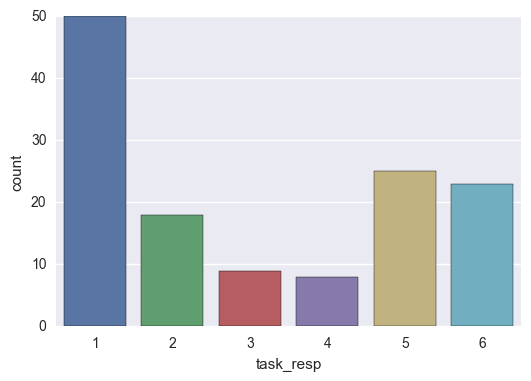

In [195]:
resp_plot = sns.countplot(x="task_resp", data=data, order=[1,2,3,4,5,6])

In [169]:
print ('Percent correct: ')
print (data.groupby('task')['correct_source'].value_counts()[:,1]/(data.groupby('task')['correct_source'].value_counts()[:,0] + data.groupby('task')['correct_source'].value_counts()[:,1]) * 100) 

Percent correct: 
task
Describes_you    73.584906
Emotion          88.636364
Name: correct_source, dtype: float64


Looks like emotion is remembered a little better

In [178]:
print (data.groupby(['subject','task'])['correct_source'].value_counts())

subject  task           correct_source
Pilot1   Describes_you  1.0                8
                        0.0                2
         Emotion        1.0               10
Pilot2   Describes_you  1.0                7
                        0.0                4
         Emotion        1.0                6
                        0.0                2
Pilot3   Describes_you  1.0                8
                        0.0                2
         Emotion        1.0               10
Pilot4   Describes_you  1.0               16
                        0.0                6
         Emotion        1.0               13
                        0.0                3
Name: correct_source, dtype: int64
